<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/OXY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [288]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [289]:
#Get the stock quote
data = yf.download('OXY', start=start_date, end=end_date)
#df = web.DataReader('OXY', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,41.630001,42.689999,41.580002,42.580002,41.213943,13066400
2020-01-03,43.810001,44.250000,43.169998,43.610001,42.210899,15097400
2020-01-06,43.980000,45.450001,43.689999,45.049999,43.604702,16659700
2020-01-07,45.080002,45.279999,44.180000,45.270000,43.817642,12084800
2020-01-08,45.540001,45.779999,44.270000,44.980000,43.536949,12250900
...,...,...,...,...,...,...
2021-07-15,27.690001,28.260000,26.930000,27.230000,27.230000,18361000
2021-07-16,27.500000,27.590000,25.870001,25.940001,25.940001,18490900
2021-07-19,24.389999,25.110001,23.900000,24.820000,24.820000,28376800


In [291]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

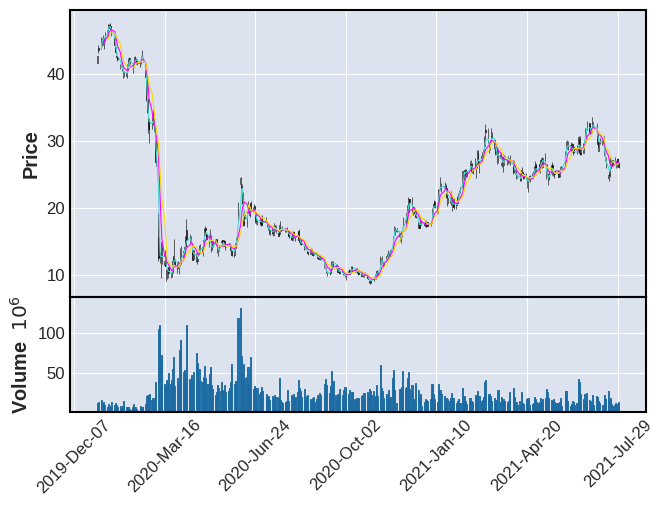

In [292]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [293]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [294]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.87806158],
       [0.90489844],
       [0.94241795],
       [0.94815013],
       [0.94059409],
       [0.95075562],
       [0.96456496],
       [0.98202192],
       [0.99947898],
       [1.        ],
       [0.98462741],
       [0.9627411 ],
       [0.92339764],
       [0.89656077],
       [0.87649823],
       [0.86868167],
       [0.84314755],
       [0.84210532],
       [0.82308501],
       [0.82621161],
       [0.80354358],
       [0.81292348],
       [0.82386663],
       [0.86607609],
       [0.86607609],
       [0.8600834 ],
       [0.82386663],
       [0.84132359],
       [0.8757166 ],
       [0.86399172],
       [0.85252736],
       [0.85148522],
       [0.87623762],
       [0.8882231 ],
       [0.86607609],
       [0.79729028],
       [0.71156852],
       [0.66023977],
       [0.5974466 ],
       [0.62167803],
       [0.6271496 ],
       [0.62819184],
       [0.62662849],
       [0.58884837],
       [0.4684732 ],
       [0.09458052],
       [0.1422616 ],
       [0.076

In [295]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.87806158, 0.90489844, 0.94241795, 0.94815013, 0.94059409,
       0.95075562, 0.96456496, 0.98202192, 0.99947898, 1.        ,
       0.98462741, 0.9627411 , 0.92339764, 0.89656077, 0.87649823,
       0.86868167, 0.84314755, 0.84210532, 0.82308501, 0.82621161,
       0.80354358, 0.81292348, 0.82386663, 0.86607609, 0.86607609,
       0.8600834 , 0.82386663, 0.84132359, 0.8757166 , 0.86399172,
       0.85252736, 0.85148522, 0.87623762, 0.8882231 , 0.86607609,
       0.79729028, 0.71156852, 0.66023977, 0.5974466 , 0.62167803,
       0.6271496 , 0.62819184, 0.62662849, 0.58884837, 0.4684732 ,
       0.09458052, 0.1422616 , 0.0760813 , 0.07842627, 0.14017719,
       0.08181346, 0.06409589, 0.04299113, 0.05080771, 0.03517456,
       0.02110473, 0.04794164, 0.08129234, 0.10291819, 0.07113079])]
[0.055497660602999016]



In [296]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [303]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [304]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [305]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 12s 36ms/step - loss: 0.0054


In [306]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [307]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [308]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [309]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

2.7939770614044575

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


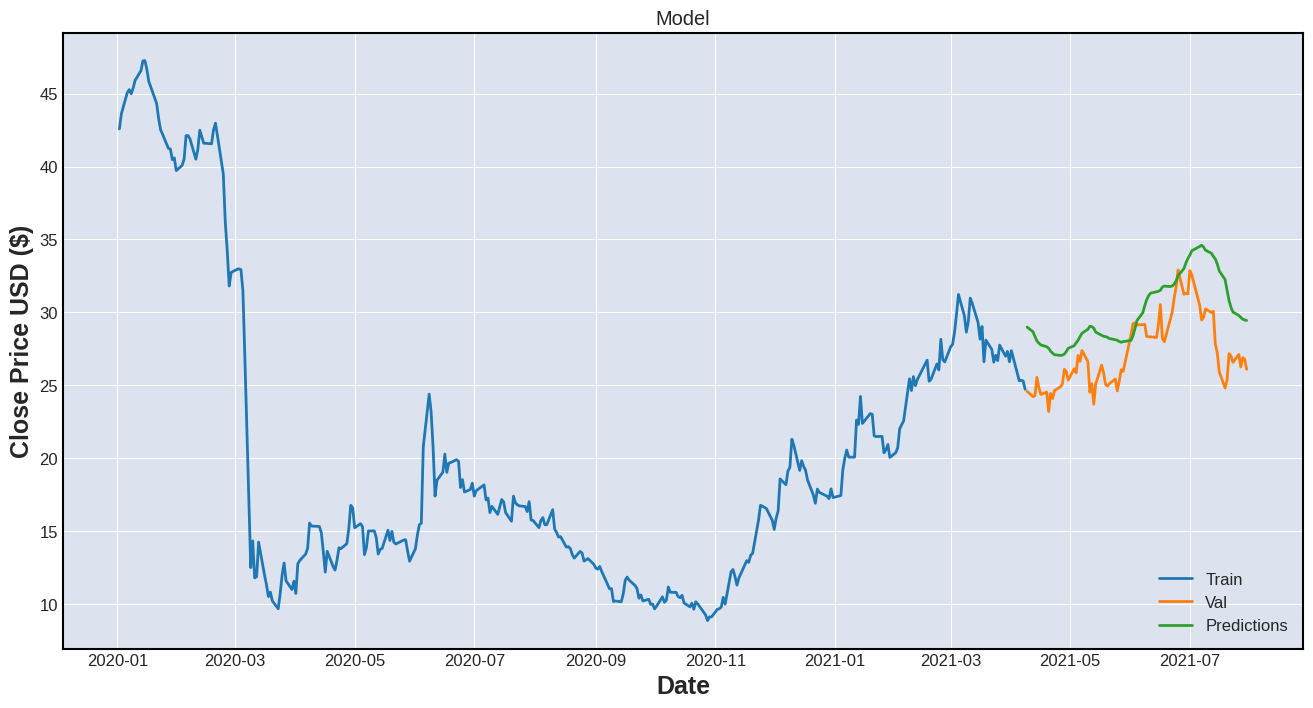

In [310]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [311]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,24.590000,28.993282
2021-04-12,24.230000,28.675255
2021-04-13,24.290001,28.347511
2021-04-14,25.549999,28.045841
2021-04-15,24.860001,27.890574
...,...,...
2021-07-26,27.120001,29.787832
2021-07-27,26.260000,29.660860
2021-07-28,26.900000,29.535631


In [312]:
#get the quote
apple_quote = yf.download('OXY', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[29.391474]]
